Import packages and functions

In [1]:
import sys
sys.path.append('../../../')


import numpy as np
import matplotlib.pyplot as plt
from scripts.forecast import compare_fisher_matrices, FisherMatrix
import seaborn as sns
from scripts.utils import  set_mpl, path2plots, path2res_forecast
set_mpl()



Define the photo-z properties and plotting style

In [2]:

sigmas_clu = np.array([0.3, 0.2, 0.1,   0.07, 0.05,
                       0.03, 0.02, 0.015, 0.01, 0.005])
f_fails_clu = np.array([0.01, 0.02, 0.05,  0.1, 0.2])


sigmas_agn = np.array([0.3, 0.2, 0.1,   0.07, 0.05,
                       0.03, 0.02, 0.015])
f_fails_agn = np.array([0.01, 0.02, 0.05,  0.1, 0.2])


corner_plot_args = {'linewidths': [1.5, 1.5, 2], 'shade': True,  'shade_alpha': 0.4, 'sigmas': [1], 'label_font_size': 18, 'tick_font_size': 13, 'colors': sns.color_palette('pastel').as_hex(), 
'linestyles': ['--', '--', '-'], 'legend_kwargs':{'title':r'Tracer ($\sigma_0$; $f_{{\rm fail}}$)', 'fontsize': 13}}

%matplotlib inline
savepath = path2res_forecast + 'cosmo-photoz/'



Load the results of the previous script

In [3]:
def load_fisher_sigma0_f_fail(sigma_0, f_fail,):
    setname_clu = f'Clusters_{sigma_0}_{f_fail}'
    fname_clu = savepath + f'{setname_clu}.npz'
    setname_agn = f'AGN_{sigma_0}_{f_fail}'
    fname_agn = savepath + f'{setname_agn}.npz'
    Fs = []
    for fname, setname in zip([fname_clu, fname_agn], [setname_clu, setname_agn]):
        try:
            arr = np.load(fname, allow_pickle=True)
            pars = arr['pars']
            par_names = arr['par_names']
            F = arr['F']
            J = arr['J']
            comp = setname.split('_')
            Fname = f'{comp[0]}({comp[1]},{comp[2]})'
            F = FisherMatrix(par=pars, par_names=par_names, F=F,
                             J=J, name=Fname, function=lambda x: x)
            F = F.transform_to_Om()
            Fs.append(F)
        except FileNotFoundError:
            Fs.append(None)
    return Fs


In [4]:
Fs = []
idx = 0
print('ID ||| sigma0 | f_fail')
for sigma_0 in sigmas_clu:
    for f_fail in f_fails_clu:
        Fs_tmp = load_fisher_sigma0_f_fail(sigma_0, f_fail)
        Fs.append([Fs_tmp[0], Fs_tmp[1]])
        print(f'  {idx} ||| {sigma_0} | {f_fail}')
        idx += 1


ID ||| sigma0 | f_fail
  0 ||| 0.3 | 0.01
  1 ||| 0.3 | 0.02
  2 ||| 0.3 | 0.05
  3 ||| 0.3 | 0.1
  4 ||| 0.3 | 0.2
  5 ||| 0.2 | 0.01
  6 ||| 0.2 | 0.02
  7 ||| 0.2 | 0.05
  8 ||| 0.2 | 0.1
  9 ||| 0.2 | 0.2
  10 ||| 0.1 | 0.01
  11 ||| 0.1 | 0.02
  12 ||| 0.1 | 0.05
  13 ||| 0.1 | 0.1
  14 ||| 0.1 | 0.2
  15 ||| 0.07 | 0.01
  16 ||| 0.07 | 0.02
  17 ||| 0.07 | 0.05
  18 ||| 0.07 | 0.1
  19 ||| 0.07 | 0.2
  20 ||| 0.05 | 0.01
  21 ||| 0.05 | 0.02
  22 ||| 0.05 | 0.05
  23 ||| 0.05 | 0.1
  24 ||| 0.05 | 0.2
  25 ||| 0.03 | 0.01
  26 ||| 0.03 | 0.02
  27 ||| 0.03 | 0.05
  28 ||| 0.03 | 0.1
  29 ||| 0.03 | 0.2
  30 ||| 0.02 | 0.01
  31 ||| 0.02 | 0.02
  32 ||| 0.02 | 0.05
  33 ||| 0.02 | 0.1
  34 ||| 0.02 | 0.2
  35 ||| 0.015 | 0.01
  36 ||| 0.015 | 0.02
  37 ||| 0.015 | 0.05
  38 ||| 0.015 | 0.1
  39 ||| 0.015 | 0.2
  40 ||| 0.01 | 0.01
  41 ||| 0.01 | 0.02
  42 ||| 0.01 | 0.05
  43 ||| 0.01 | 0.1
  44 ||| 0.01 | 0.2
  45 ||| 0.005 | 0.01
  46 ||| 0.005 | 0.02
  47 ||| 0.005 | 0.05
  48

Assign indices to the different forecasts

In [5]:

pessimistic_agn_id = 18
conservative_agn_id =  23
optimistic_agn_id =  28

pessimistic_clu_id = 32
conservative_clu_id = 41
optimistic_clu_id = 45


Plot Fisher matrices for different setups and priors

# eRASS 8 forecacst

## eROSITA only

Optimistic
$f_{\rm sky} = 0.658$
Clusters(0.005,0.01)
FoM: 1.12e+09
Omega_m: 0.300 +- 0.039 (13.1 %)
Omega_b: 0.050 +- 0.031 (61.5 %)
h: 0.700 +- 0.384 (54.8 %)
n_s: 0.960 +- 0.272 (28.3 %)
sigma_8: 0.800 +- 0.008 (1.0 %)
-------
AGN(0.03,0.1)
FoM: 6.58e+09
Omega_m: 0.300 +- 0.024 (8.1 %)
Omega_b: 0.050 +- 0.018 (35.3 %)
h: 0.700 +- 0.214 (30.6 %)
n_s: 0.960 +- 0.139 (14.5 %)
sigma_8: 0.800 +- 0.008 (1.0 %)
-------
Clusters(0.005,0.01)+AGN(0.03,0.1)
FoM: 2.43e+10
Omega_m: 0.300 +- 0.016 (5.3 %)
Omega_b: 0.050 +- 0.014 (27.6 %)
h: 0.700 +- 0.171 (24.5 %)
n_s: 0.960 +- 0.108 (11.3 %)
sigma_8: 0.800 +- 0.005 (0.6 %)
-------
Convervative
$f_{\rm sky} = 0.658$
Clusters(0.01,0.02)
FoM: 2.67e+08
Omega_m: 0.300 +- 0.048 (15.9 %)
Omega_b: 0.050 +- 0.041 (81.4 %)
h: 0.700 +- 0.507 (72.4 %)
n_s: 0.960 +- 0.345 (36.0 %)
sigma_8: 0.800 +- 0.011 (1.4 %)
-------
AGN(0.05,0.1)
FoM: 1.76e+09
Omega_m: 0.300 +- 0.031 (10.3 %)
Omega_b: 0.050 +- 0.023 (45.9 %)
h: 0.700 +- 0.283 (40.4 %)
n_s: 0.960 +- 0.179

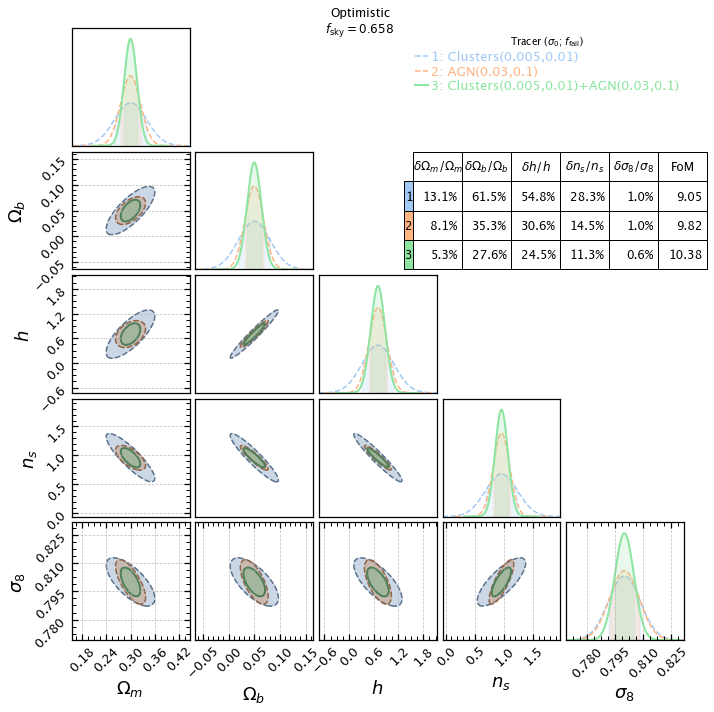

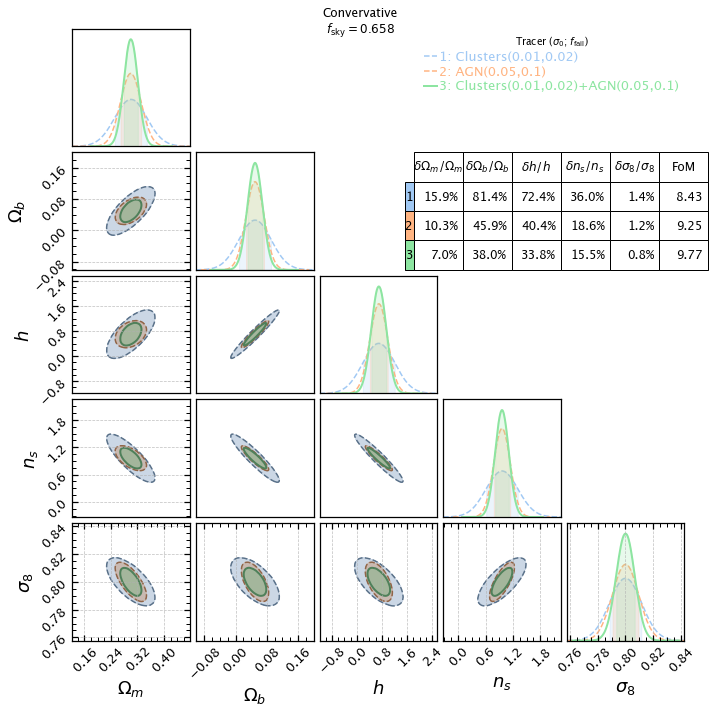

In [6]:
fig, table = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0], Fb:=Fs[optimistic_agn_id][1], Fa+Fb], title = 'Optimistic', filename = f'{path2plots}/cosmo_forecast/fisher_matr_optimistic.png', fsky = 0.658, factor = 1,
**corner_plot_args)

fig, table = compare_fisher_matrices([Fa:=Fs[conservative_clu_id][0], Fb:=Fs[conservative_agn_id][1], Fa+Fb], title = 'Convervative', filename = f'{path2plots}/cosmo_forecast/fisher_matr_concervative.png', fsky = 0.658,
**corner_plot_args)




In [7]:
table

,$\Omega_m$,$\Omega_b$,$h$,$n_s$,$\sigma_8$,FoM
"Clusters(0.01,0.02)",15.9%,81.4%,72.4%,36.0%,1.4%,8.43
"AGN(0.05,0.1)",10.3%,45.9%,40.4%,18.6%,1.2%,9.25
"Clusters(0.01,0.02)+AGN(0.05,0.1)",7.0%,38.0%,33.8%,15.5%,0.8%,9.77


## Hubble constant  weak prior

Optimistic
$f_{\rm sky} = 0.658$
Clusters(0.005,0.01) h prior (0.1)
FoM: 4.43e+09
Omega_m: 0.300 +- 0.027 (8.9 %)
Omega_b: 0.050 +- 0.010 (19.1 %)
h: 0.700 +- 0.097 (13.8 %)
n_s: 0.960 +- 0.095 (9.9 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------
AGN(0.03,0.1) h prior (0.1)
FoM: 1.56e+10
Omega_m: 0.300 +- 0.023 (7.5 %)
Omega_b: 0.050 +- 0.009 (17.7 %)
h: 0.700 +- 0.091 (12.9 %)
n_s: 0.960 +- 0.072 (7.5 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------
Clusters(0.005,0.01) h prior (0.1)+AGN(0.03,0.1) h prior (0.1)
FoM: 6.36e+10
Omega_m: 0.300 +- 0.014 (4.8 %)
Omega_b: 0.050 +- 0.006 (12.5 %)
h: 0.700 +- 0.065 (9.3 %)
n_s: 0.960 +- 0.052 (5.4 %)
sigma_8: 0.800 +- 0.004 (0.5 %)
-------
Convervative
$f_{\rm sky} = 0.658$
Clusters(0.01,0.02) h prior (0.1)
FoM: 1.38e+09
Omega_m: 0.300 +- 0.035 (11.7 %)
Omega_b: 0.050 +- 0.011 (22.2 %)
h: 0.700 +- 0.098 (14.0 %)
n_s: 0.960 +- 0.111 (11.5 %)
sigma_8: 0.800 +- 0.009 (1.1 %)
-------
AGN(0.05,0.1) h prior (0.1)
FoM: 5.29e+09
Omega_m: 0.300 +- 0.029 (9.8 %)
O

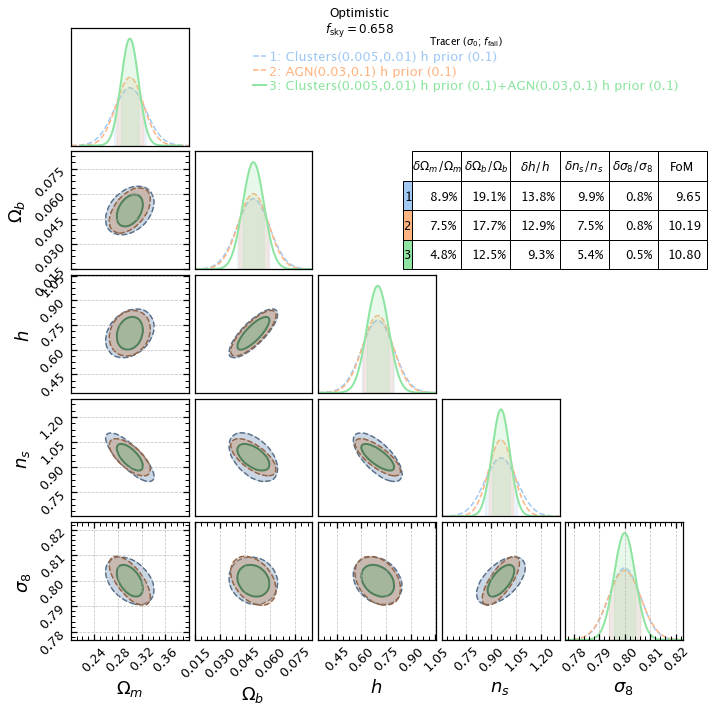

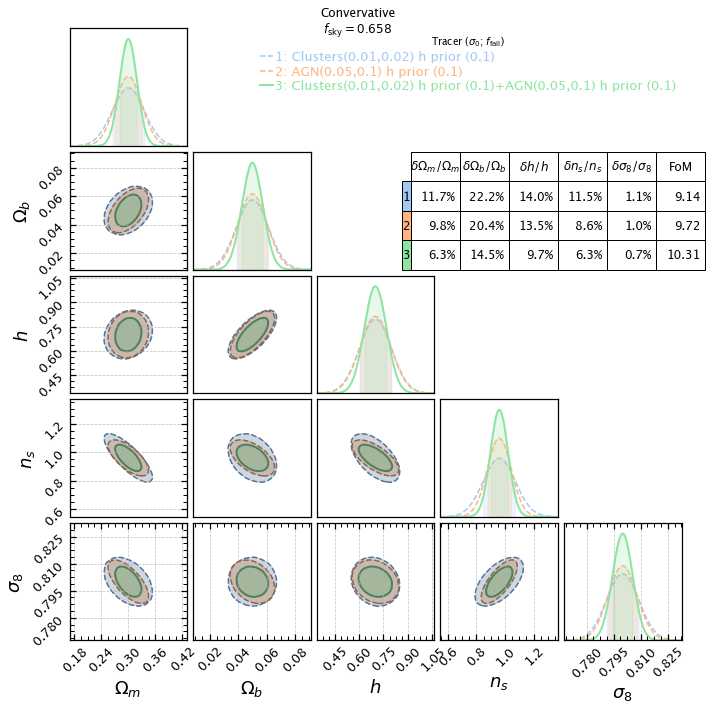

In [8]:
fig, table = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0].add_prior_by_idx(2, 0.1), Fb:=Fs[optimistic_agn_id][1].add_prior_by_idx(2, 0.1), Fa+Fb], title = 'Optimistic', filename = f'{path2plots}/cosmo_forecast/fisher_matr_optimistic_prior.png', fsky = 0.658, factor = 1,
**corner_plot_args)

fig, table = compare_fisher_matrices([Fa:=Fs[conservative_clu_id][0].add_prior_by_idx(2, 0.1), Fb:=Fs[conservative_agn_id][1].add_prior_by_idx(2, 0.1), Fa+Fb], title = 'Convervative', filename = f'{path2plots}/cosmo_forecast/fisher_matr_concervative_prior.png',fsky = 0.658, factor = 1,
**corner_plot_args)




## n_s, Ob planck prior

Optimistic
$f_{\rm sky} = 0.658$
Clusters(0.005,0.01) n_s prior (0.004) Omega_b prior (0.0006)
FoM: 1.29e+12
Omega_m: 0.300 +- 0.017 (5.8 %)
Omega_b: 0.050 +- 0.001 (1.2 %)
h: 0.700 +- 0.053 (7.6 %)
n_s: 0.960 +- 0.004 (0.4 %)
sigma_8: 0.800 +- 0.005 (0.6 %)
-------
AGN(0.03,0.1) n_s prior (0.004) Omega_b prior (0.0006)
FoM: 2.79e+12
Omega_m: 0.300 +- 0.018 (6.2 %)
Omega_b: 0.050 +- 0.001 (1.2 %)
h: 0.700 +- 0.052 (7.4 %)
n_s: 0.960 +- 0.004 (0.4 %)
sigma_8: 0.800 +- 0.004 (0.5 %)
-------
Clusters(0.005,0.01) n_s prior (0.004) Omega_b prior (0.0006)+AGN(0.03,0.1) n_s prior (0.004) Omega_b prior (0.0006)
FoM: 1.3e+13
Omega_m: 0.300 +- 0.012 (3.9 %)
Omega_b: 0.050 +- 0.000 (0.8 %)
h: 0.700 +- 0.033 (4.7 %)
n_s: 0.960 +- 0.003 (0.3 %)
sigma_8: 0.800 +- 0.003 (0.4 %)
-------
Convervative
$f_{\rm sky} = 0.658$
Clusters(0.01,0.02) n_s prior (0.004) Omega_b prior (0.0006)
FoM: 5.33e+11
Omega_m: 0.300 +- 0.025 (8.3 %)
Omega_b: 0.050 +- 0.001 (1.2 %)
h: 0.700 +- 0.075 (10.8 %)
n_s: 0.960 +- 0.0

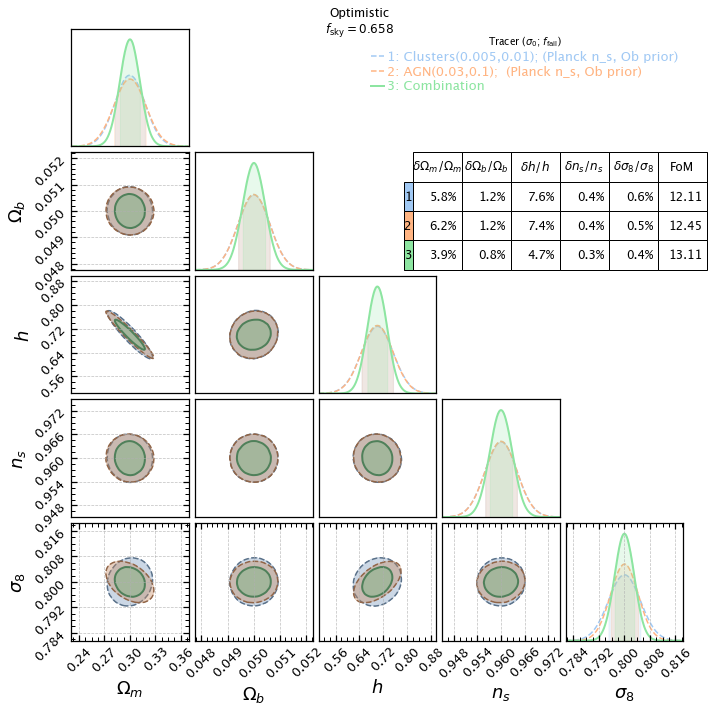

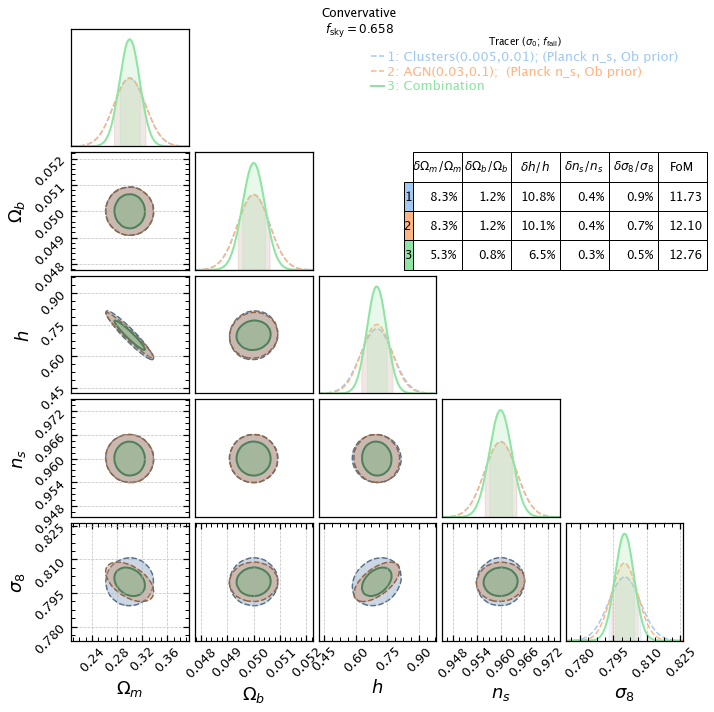

In [9]:
fig, table = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0].add_prior_by_idx(3, 0.004).add_prior_by_idx(1, 0.0006), Fb:=Fs[optimistic_agn_id][1].add_prior_by_idx(3, 0.004).add_prior_by_idx(1, 0.0006), Fa+Fb], title = 'Optimistic', filename = f'{path2plots}/cosmo_forecast/fisher_matr_optimistic_plank_prior.png', fsky = 0.658, factor = 1,
names_list=['Clusters(0.005,0.01); (Planck n_s, Ob prior)','AGN(0.03,0.1);  (Planck n_s, Ob prior)', 'Combination'],
**corner_plot_args)

fig, table = compare_fisher_matrices([Fa:=Fs[conservative_clu_id][0].add_prior_by_idx(3, 0.004).add_prior_by_idx(1, 0.0006), Fb:=Fs[conservative_agn_id][1].add_prior_by_idx(3, 0.004).add_prior_by_idx(1, 0.0006), Fa+Fb], title = 'Convervative', filename = f'{path2plots}/cosmo_forecast/fisher_matr_conservative_plank_prior.png', fsky = 0.658, factor = 1,
names_list=['Clusters(0.005,0.01); (Planck n_s, Ob prior)','AGN(0.03,0.1);  (Planck n_s, Ob prior)', 'Combination'],
**corner_plot_args)




# Corner plots and tables for the Paper

$h$ prior
$f_{\rm sky} = 0.658$
Clusters(0.005,0.01) h prior (0.1)
FoM: 4.43e+09
Omega_m: 0.300 +- 0.027 (8.9 %)
Omega_b: 0.050 +- 0.010 (19.1 %)
h: 0.700 +- 0.097 (13.8 %)
n_s: 0.960 +- 0.095 (9.9 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------
AGN(0.03,0.1) h prior (0.1)
FoM: 1.56e+10
Omega_m: 0.300 +- 0.023 (7.5 %)
Omega_b: 0.050 +- 0.009 (17.7 %)
h: 0.700 +- 0.091 (12.9 %)
n_s: 0.960 +- 0.072 (7.5 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------
Clusters(0.005,0.01) h prior (0.1)+AGN(0.03,0.1) h prior (0.1)
FoM: 6.36e+10
Omega_m: 0.300 +- 0.014 (4.8 %)
Omega_b: 0.050 +- 0.006 (12.5 %)
h: 0.700 +- 0.065 (9.3 %)
n_s: 0.960 +- 0.052 (5.4 %)
sigma_8: 0.800 +- 0.004 (0.5 %)
-------


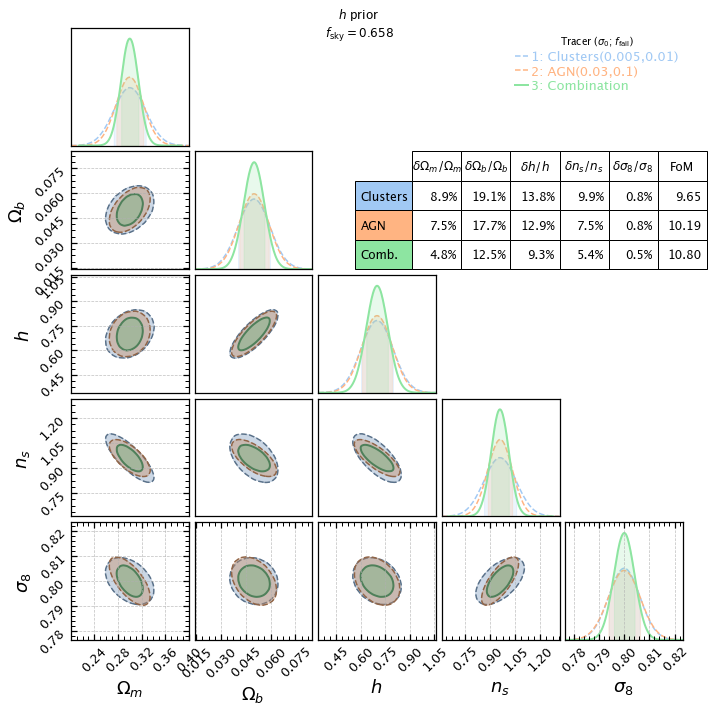

In [11]:
from scripts.forecast import compare_fisher_matrices

fig, table = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0].add_prior_by_idx(2, 0.1), Fb:=Fs[optimistic_agn_id][1].add_prior_by_idx(2, 0.1), Fa+Fb], title = '$h$ prior', filename = f'{path2plots}/cosmo_forecast/fisher_matr_optimistic_prior.png', fsky = 0.658, factor = 1,
names_list=['Clusters(0.005,0.01)','AGN(0.03,0.1)', 'Combination'], table_row_labels = ['Clusters', 'AGN', 'Comb.'],
**corner_plot_args)

